### Assignment 3


### Import libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

### Loading the  Dataset

In [2]:
#load the california housing dataset
df=pd.read_csv("~/Downloads/housing.csv")
df



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
#printing the number of rows and columns in the dataset
df.shape
print("The Number of rows and columns in the datset are :",df.shape[0]," and ",df.shape[1]," respectively")

The Number of rows and columns in the datset are : 20640  and  10  respectively


In [4]:
#printing the first 5 rows of the dataset
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#checking the datatypes and if there are any null values in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#checking the mean,median,interquartile values for all the features
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Performing Exploratory Data Analysis on the dataset

In [7]:
#Print name of all the columns and type of each column (numerical or categorical)
for column in df.columns:
    column_type = df[column].dtype
    print(f'Column: {column}, Type: {column_type}')

Column: longitude, Type: float64
Column: latitude, Type: float64
Column: housing_median_age, Type: float64
Column: total_rooms, Type: float64
Column: total_bedrooms, Type: float64
Column: population, Type: float64
Column: households, Type: float64
Column: median_income, Type: float64
Column: median_house_value, Type: float64
Column: ocean_proximity, Type: object


housing_median_age :  0.060330637599136865
total_rooms :  4.147343450632158
total_bedrooms :  3.459546331523342
population :  4.93585822672712
households :  3.410437711667147
median_income :  1.6466567021344465
median_house_value :  0.9777632739098341


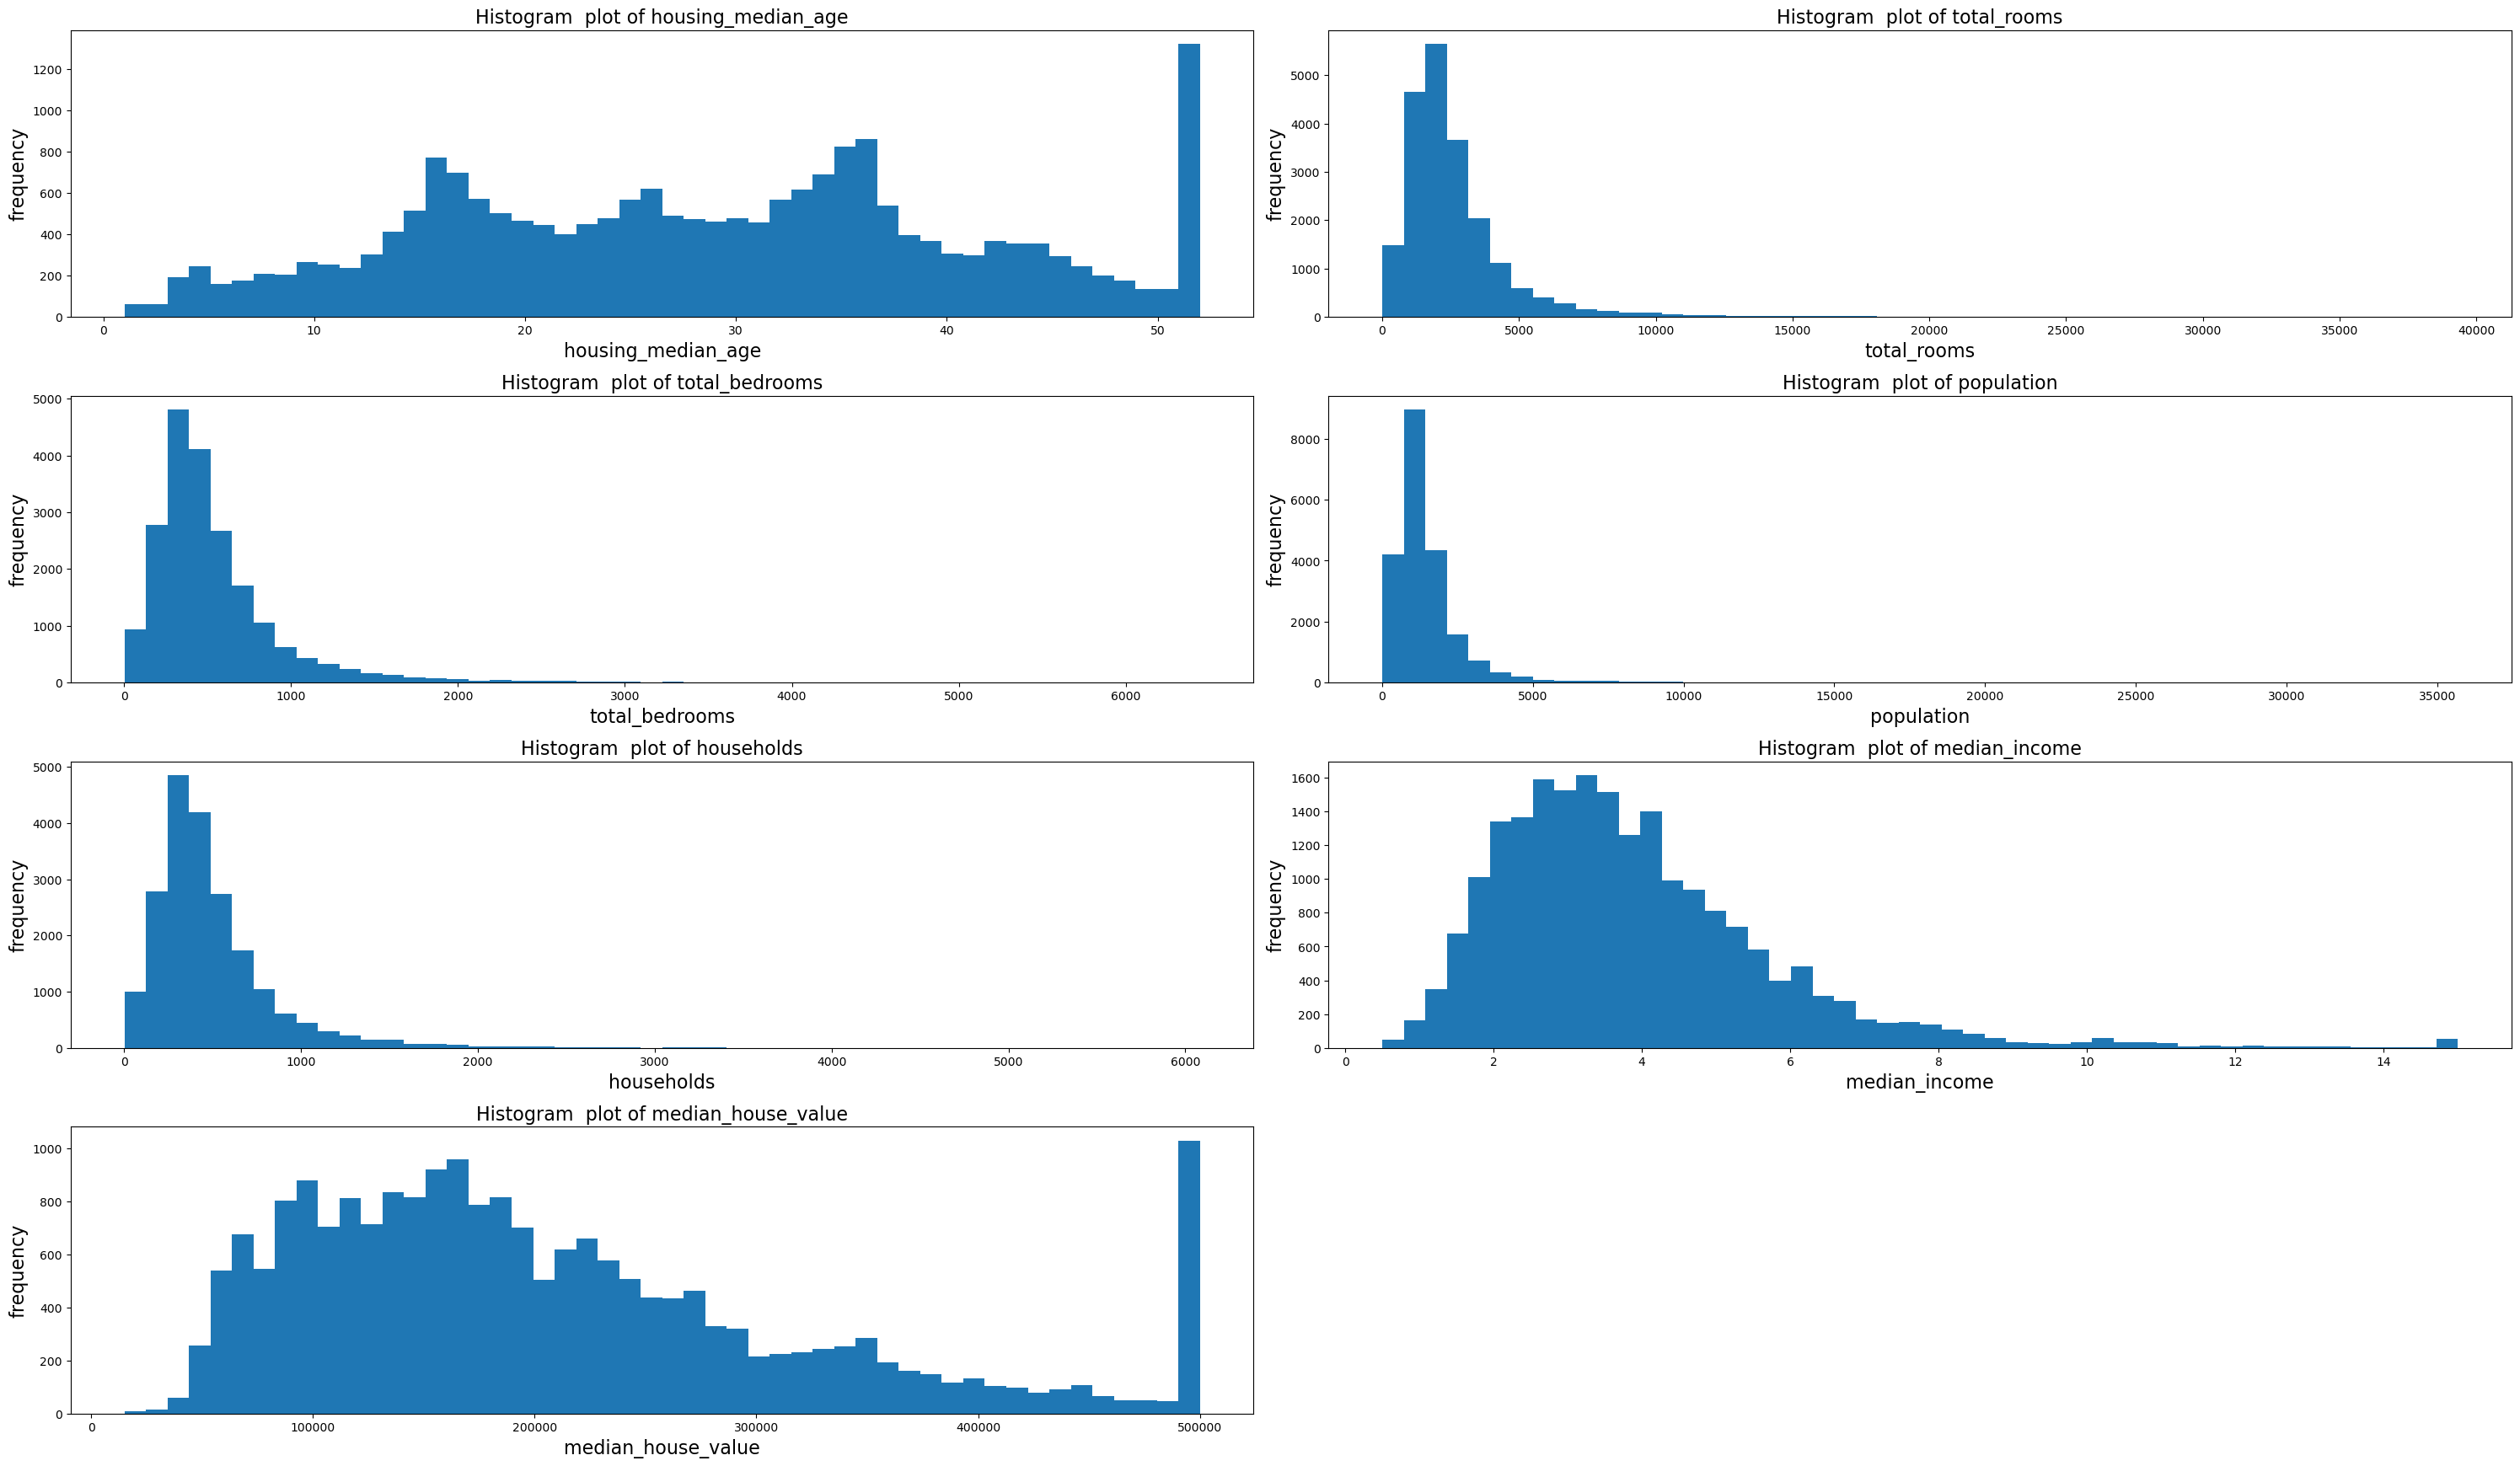

In [8]:
#For all the numerical columns plot the histogram distribution and write your observations about them. (Except latitude and longitude)
i = 0
plt.figure(figsize=(30, 30))

for column in df.columns:
    if df[column].dtype=="float64" and column!="longitude" and column!="latitude":
        i+=1
        plt.subplot(7,2,i)
        plt.hist(df[column],50);
        plt.title(f"Histogram  plot of {column}",fontsize=16)
        plt.xlabel(column,fontsize=16)
        plt.ylabel("frequency",fontsize=16)
        plt.tight_layout()
        print(column,": ",df[column].skew())
        

    

Histogram plot for housing_median_age:

The plot is random with peaking at the end.However, when we check the skewness it is between -1 to 1.

Histogram plot for total_rooms, total_bedrooms, population, households and median_income:

The plot is right skewed which indicates the presence of outliers on the right side and it occurs when the mean (average) of the data is greater than the median.As, we can see from the table above that for the features like total_rooms, total_bedrooms, population, households and median_income mean is greter than the median. This means that the majority of the data points are below the mean, and the outliers on the right side are pulling the mean higher.It implies that extreme values on the right side of the distribution are relatively rare but can significantly affect the mean and the overall shape of the distribution.

Histogram plot for median_house_value:

The plot is random with peaking at the end.However, when we check the skewness it is between -1 to 1.


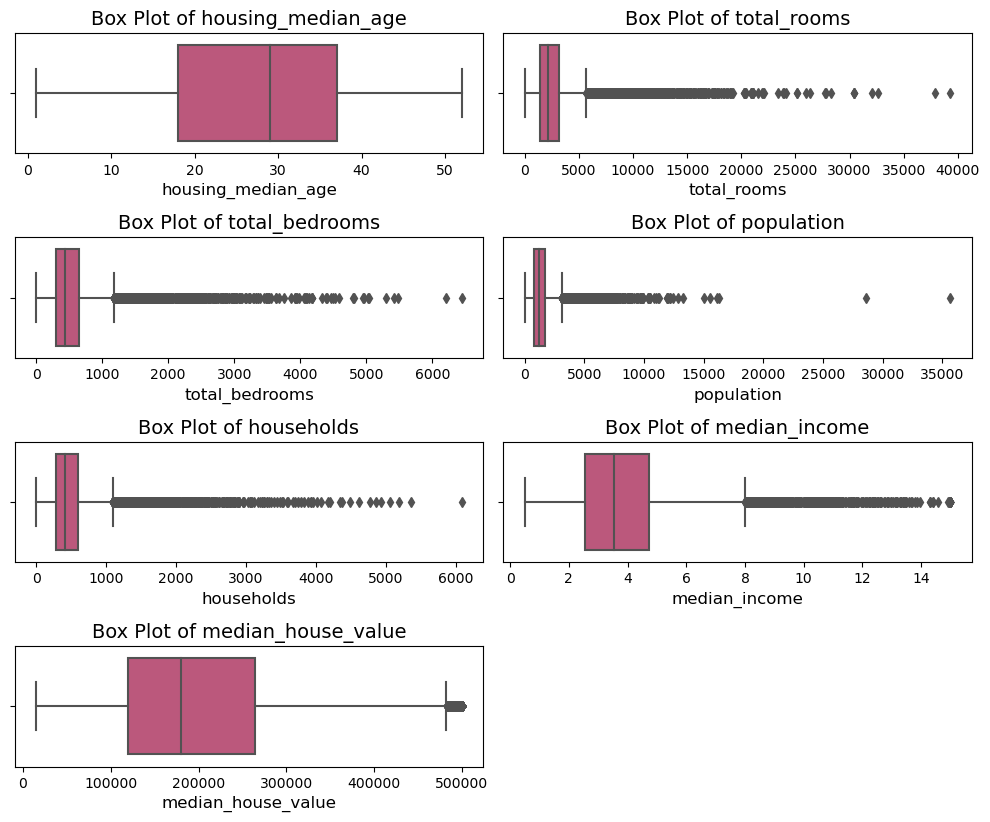

In [9]:
#For all the numerical columns plot the box plots and check if there are outliers in any of the column. (Except latitude and longitude)
i = 0
plt.figure(figsize=(10, 14))
for column in df.columns:
    if df[column].dtype == "float64" and column != "longitude" and column != "latitude":
        i += 1
        plt.subplot(7, 2, i)
        sns.boxplot(data=df,x=column,palette="plasma")
        plt.xlabel(column, fontsize=12)   
        plt.title(f'Box Plot of {column}', fontsize=14)
        plt.tight_layout()

plt.show()


From the box plot we can see that there are outliers for all the parameters except for housing median age


In [10]:
#print the outliers
for col in df.columns:
    if df[col].dtype=="float64":
    # Identify and replace outliers in the specific column
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      whisker_width = 1.5
      lower_whisker = Q1 -(whisker_width*IQR)
      upper_whisker = Q3 +(whisker_width*IQR)
      df_outliers=df[(df[col]<lower_whisker)|(df[col]>upper_whisker)]
      
print("The outliers for the dataset are \n:", df_outliers)


The outliers for the dataset are 
:        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
140      -122.18     37.81                30.0        292.0            38.0   
459      -122.25     37.87                52.0        609.0           236.0   
489      -122.25     37.86                48.0       2153.0           517.0   
493      -122.24     37.86                52.0       1668.0           225.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       populati

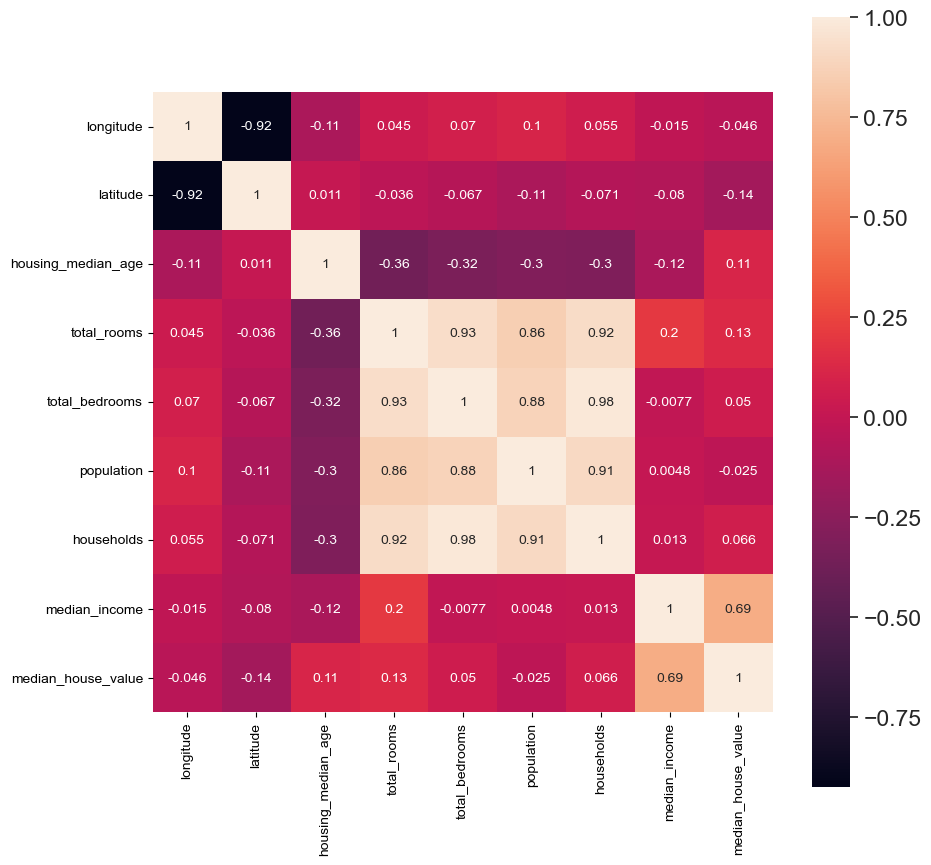

In [11]:
"""Plot a heatmap and check whether there is a correlation between different numerical
features."""
import seaborn as sns
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (df.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

In [12]:
"""Also check the correlation of different features with the target feature median_house_value."""
abs(df[df.columns[:]].corr()['median_house_value'][:]).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

We can see that the correlation of median_income,latitude and total_rooms features is highest with the target feature median_house_value

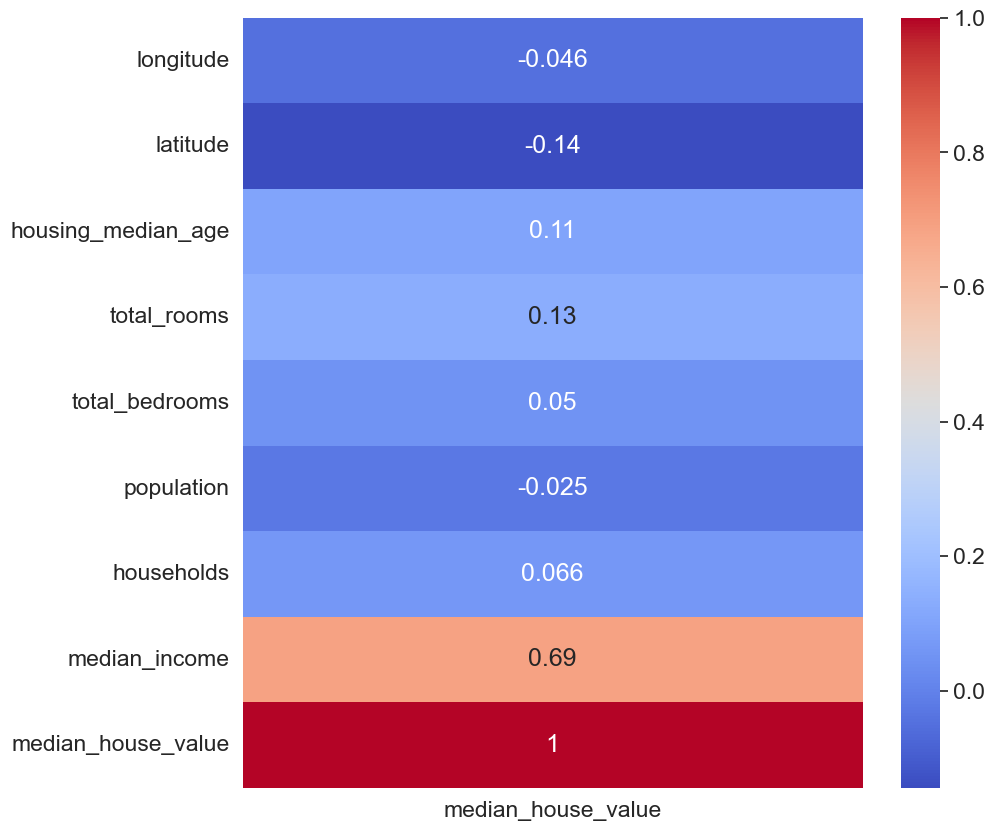

In [13]:
"""Plotting a heatmap and checking the correlation of different features with the target feature"""
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.5)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['median_house_value']], annot=True, cmap="coolwarm", ax=ax, cbar=True)
plt.show()

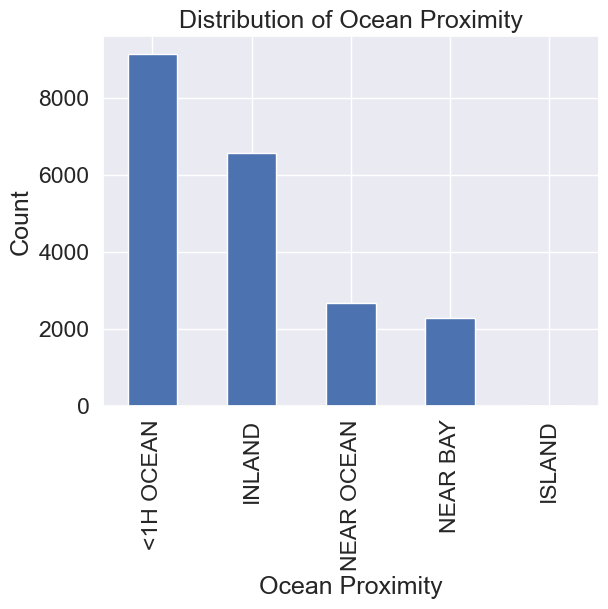

In [14]:
"""Plot a barplot to check how many houses are in different subcategories of the feature ‘ocean_proximity'."""
df['ocean_proximity'].value_counts().plot.bar()
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Distribution of Ocean Proximity')

plt.show()

### Preprocessing the dataset

In [15]:
#checking if there are any null values in the dataset. 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We can also notice this when we tried to get the information for all the features that total_bedrooms has null values

In [16]:
#finding the median for the column with the null values
df['total_bedrooms'].median()

435.0

In [17]:
#replacing all the null values for the total bedrooms column with the median value
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [18]:
#checking if there are any null values now
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
#remove the outlier datapoints from the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
# Define a function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

df_removed_outliers = remove_outliers(df, numerical_columns.columns)

# Display the shape of the cleaned DataFrame to see how many outliers were removed
print("Original DataFrame shape:", df.shape)
print("After removal of outliers DataFrame shape:", df_removed_outliers.shape)




Original DataFrame shape: (20640, 10)
After removal of outliers DataFrame shape: (16896, 10)


In [20]:
#after removal of outliers checking if there are any outliers present in the actual dataframe
for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

print(df.shape) 

(0, 10)


In [21]:
"""Encode the categorical variable ocean proximity using Label encoder or One hot encoder"""
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_removed_outliers['ocean_proximity'] = label_encoder.fit_transform(df_removed_outliers['ocean_proximity'])
df_removed_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


### Splitting the Dataset

In [22]:
"""Storing  the values of median_house_value feature in a variable named ‘target’"""

target=df_removed_outliers['median_house_value']
print(target)

2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 16896, dtype: float64


In [23]:
"""Dropping the feature from the dataframe. After this step you should have shape of df as 20640 x 9"""

df2=df_removed_outliers.drop(columns='median_house_value')
print(df2)
print(df2.shape)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [24]:
"""Splitting df into X_train and X_test with test ratio 0.2 and similarly, creating y_train and y_test"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2, random_state=200)

Text(0.5, 1.0, 'Histogram for Trained Target and Test Traget Median house value')

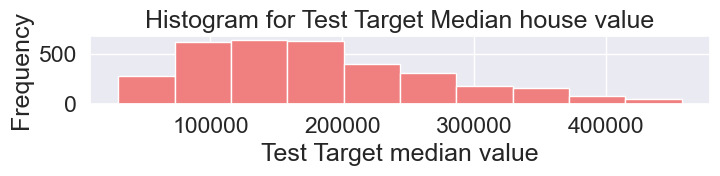

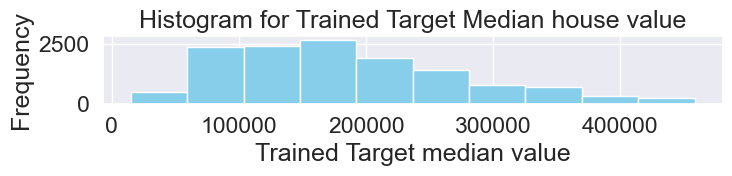

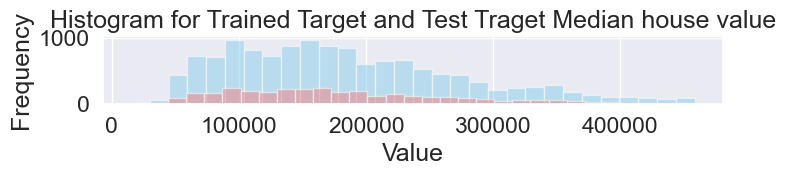

In [25]:
"""Plot histogram distribution of y_train and y_test and check whether they follow similar
distribution."""


plt.figure(figsize=(8,3))
plt.subplot(3,1,1)
plt.hist(y_test, color="lightcoral")
plt.xlabel('Test Target median value')
plt.ylabel('Frequency')
plt.title('Histogram for Test Target Median house value')

plt.figure(figsize=(8,3))
plt.subplot(3,1,2)
plt.hist(y_train, color="skyblue")
plt.xlabel('Trained Target median value')
plt.ylabel('Frequency')
plt.title('Histogram for Trained Target Median house value')

plt.figure(figsize=(8,3))
plt.subplot(3,1,3)
plt.hist(y_train, color="skyblue",alpha=0.5,bins=30)
plt.hist(y_test, color="lightcoral",alpha=0.5,bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Trained Target and Test Traget Median house value')





From the plotting of 2 histograms in the same graph we can see that there is overlap.Hence,we can say that they follow similar distribution

### Training the Model

In [26]:
"""Defining a Linear regression model and fit(train) the model only on train data"""

from sklearn.linear_model import LinearRegression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Intercept
print(linear_model.intercept_)

-3166160.6740949154


In [28]:
# The coefficients
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [-3.77293674e+04 -3.75095960e+04  9.28802896e+02 -1.59863096e+01
  1.68938284e+02 -6.60223054e+01  1.13552305e+02  4.02594687e+04
 -1.47491067e+03]


In [29]:
train_pred=linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

In [30]:
"""Compute the mean_squared_error and R square error on train_data and test_data for the
model and write your observations on the performance of the model."""

from sklearn.metrics import mean_squared_error, r2_score
train_mean_squared_error = mean_squared_error(y_train, train_pred)
test_mean_squared_error = mean_squared_error(y_test, test_pred)

In [31]:
train_r_squared = r2_score(y_train, train_pred)
test_r_squared = r2_score(y_test, test_pred)

In [32]:
print(f"Train Mean Squared Error: {train_mean_squared_error}")
print(f"Test Mean Squared Error: {test_mean_squared_error}")
print(f"Train R-squared: {train_r_squared}")
print(f"Test R-squared: {test_r_squared}")

Train Mean Squared Error: 3273041197.4906764
Test Mean Squared Error: 3248361085.8610215
Train R-squared: 0.6167051268166869
Test R-squared: 0.6038449409785677


From the Train and Test MSE:

The test MSE is slightly lower than the train MSE, which is a positive sign. This suggests that the model is not significantly overfitting the training data.

From the Train and Test R-squared:

Both the train and test R-squared values are close to each other and greater than 0.5. This indicates that the model explains a significant portion of the variance in both the training and test datasets.

The model appears to be performing reasonably well.

### Feature importance and Feature selection

In [33]:

# Finding top 3 features which are most useful in predicting the median_house_value.
correlation_median_house_value = df2.corrwith(target)


sorted_correlations=correlation_median_house_value.abs().sort_values(ascending=False)

# Get the top 3 features with the highest absolute correlation (excluding the target itself)
top_3_features = sorted_correlations
top_3_features

median_income         0.635459
total_rooms           0.202045
latitude              0.163546
households            0.121735
housing_median_age    0.090872
total_bedrooms        0.089335
ocean_proximity       0.064493
longitude             0.038379
population            0.008078
dtype: float64

In [34]:
X_train_top_features = X_train.loc[:,top_3_features.index[0:3]]
print(X_train_top_features)
X_test_top_features = X_test.loc[:, top_3_features.index[0:3]]
print(X_test_top_features)

       median_income  total_rooms  latitude
16567         6.0389       1365.0     37.70
3496          4.9323       1231.0     34.27
16484         3.6528        651.0     38.25
759           2.5625       1547.0     37.66
14426         2.5568       1601.0     32.80
...              ...          ...       ...
11024         4.8542       1454.0     33.79
17214         4.1316       1837.0     34.44
860           5.7192       3575.0     37.58
15870         3.0865        492.0     37.76
2083          1.7298       1788.0     36.75

[13516 rows x 3 columns]
       median_income  total_rooms  latitude
88            0.9722        105.0     37.80
14351         2.8043       2072.0     32.75
16321         6.5560       3111.0     37.99
1616          8.0074       5252.0     37.85
10585         6.8634       3477.0     33.72
...              ...          ...       ...
10024         2.2917        983.0     39.22
793           5.2838       1180.0     37.64
12668         2.7262       4929.0     38.48
1660  

In [35]:
#Dropping all other features and train our model using only these 3 features  which is median income,total_rooms,latitude
model_top_features = LinearRegression()
model_top_features.fit(X_train_top_features, y_train)

train_predictions_top_features = model_top_features.predict(X_train_top_features)
test_predictions_top_features = model_top_features.predict(X_test_top_features)

train_mse_top_features = mean_squared_error(y_train, train_predictions_top_features)
test_mse_top_features = mean_squared_error(y_test, test_predictions_top_features)

train_r2_top_features = r2_score(y_train, train_predictions_top_features)
test_r2_top_features = r2_score(y_test, test_predictions_top_features)

In [36]:
# compute the R-square and mean_squared_error for the 3 features selected data

print("Top 3 Features:\n",X_train.loc[:,top_3_features.index[0:3]])
print(f"Train Mean Squared Error (Top Features): {train_mse_top_features}")
print(f"Test Mean Squared Error (Top Features): {test_mse_top_features}")
print(f"Train R-squared (Top Features): {train_r2_top_features}")
print(f"Test R-squared (Top Features): {test_r2_top_features}")

Top 3 Features:
        median_income  total_rooms  latitude
16567         6.0389       1365.0     37.70
3496          4.9323       1231.0     34.27
16484         3.6528        651.0     38.25
759           2.5625       1547.0     37.66
14426         2.5568       1601.0     32.80
...              ...          ...       ...
11024         4.8542       1454.0     33.79
17214         4.1316       1837.0     34.44
860           5.7192       3575.0     37.58
15870         3.0865        492.0     37.76
2083          1.7298       1788.0     36.75

[13516 rows x 3 columns]
Train Mean Squared Error (Top Features): 4982400983.136074
Test Mean Squared Error (Top Features): 4839885882.484299
Train R-squared (Top Features): 0.4165277374315739
Test R-squared (Top Features): 0.4097499548993807


After feature selection, both train and test MSE increased significantly indicating that the model's predictive accuracy decreased when using the selected features.

After feature selection, both train and test R-square dropped significantly indicating that the model's ability to explain the variance in the data has been reduced.

The significant drop in R-squared and the increase in MSE suggest that the model might be underfitting the data with the feature selected dataset. 

The model is less able to capture the relationships in the data, resulting in a poorer fit to both the training and test data.
In conclusion, the model's performance has reduced after feature selection, which is indicated by increased MSE and reduced R-squared values.